Versions:
Tensorflow: 1.14.0-rc1
Keras:  2.2.4-tf
------------------------------------
Field name      | No. of 0-entries
------------------------------------
Glucose         |   5
BloodPressure   |  35
SkinThickness   | 227
Insulin         | 374
BMI             |  11
----
TRAIN SET
----
Field name      | No. to Replace | Average   
Glucose         |              4 | 122.003
BloodPressure   |             25 | 72.846
SkinThickness   |            163 | 29.465
Insulin         |            270 | 158.464
BMI             |              8 | 32.663

------------------------------------
Field name      | No. of 0-entries
------------------------------------
Glucose         |   0
BloodPressure   |   0
SkinThickness   |   0
Insulin         |   0
BMI             |   0

----
TEST SET
----
Field name      | No. to Replace | Average   
Glucose         |              1 | 120.738
BloodPressure   |             10 | 71.071
SkinThickness   |             64 | 28.148
Insulin         |            104 | 145.4

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5079: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5080: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
W0618 14:41:56.345678 139657381259136 training.py:593] The `nb_epoch` argument in `fit` has been renamed `epochs`.


Training...

Epoch 00001: val_acc improved from -inf to 0.58333, saving model to pima-weights.best.hdf5

Epoch 00002: val_acc did not improve from 0.58333

Epoch 00003: val_acc did not improve from 0.58333

Epoch 00004: val_acc did not improve from 0.58333

Epoch 00005: val_acc did not improve from 0.58333

Epoch 00006: val_acc did not improve from 0.58333

Epoch 00007: val_acc improved from 0.58333 to 0.60938, saving model to pima-weights.best.hdf5

Epoch 00008: val_acc did not improve from 0.60938

Epoch 00009: val_acc did not improve from 0.60938

Epoch 00010: val_acc did not improve from 0.60938

Epoch 00011: val_acc improved from 0.60938 to 0.61458, saving model to pima-weights.best.hdf5

Epoch 00012: val_acc improved from 0.61458 to 0.67188, saving model to pima-weights.best.hdf5

Epoch 00013: val_acc did not improve from 0.67188

Epoch 00014: val_acc improved from 0.67188 to 0.69271, saving model to pima-weights.best.hdf5

Epoch 00015: val_acc did not improve from 0.69271

Epoch

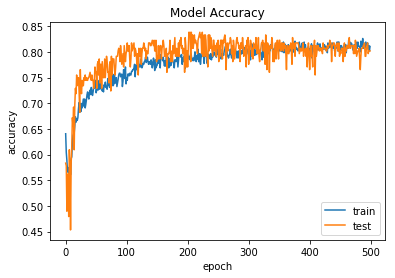

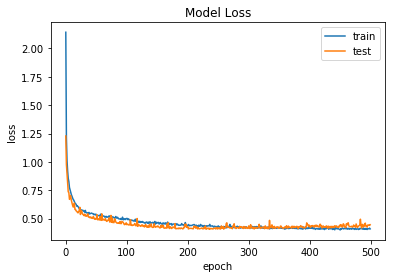

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_99 (Dense)             (None, 12)                108       
_________________________________________________________________
dense_100 (Dense)            (None, 8)                 104       
_________________________________________________________________
dense_101 (Dense)            (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
acc: 74.61%


'\n'

In [0]:
#from google.colab import files
#uploaded = files.upload()

import tensorflow as tf
from tensorflow.keras import layers
import numpy

print("Versions:")
print("Tensorflow:", tf.VERSION)
# 1.14.0-rc1
print("Keras: ", tf.keras.__version__)
#2.2.4-tf

# fix random seed for reproducibility
numpy.random.seed(7)

import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
# %matplotlib inline

path = "./data-diabetes.csv"
dataset = pd.read_csv(path)

# dataset.head()
# dataset.describe()

# There are some 0-entries in the dataset. This may or may not be important.

zero_fields = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']


def check_zero_entries(data, fields):
    # List number of 0-entries in each of the given fields

    print("------------------------------------")
    print("Field name      | No. of 0-entries" )
    print("------------------------------------")

    for field in fields:
        count = len(data.loc[ data[field] == 0, field ])
        print('{:15.15} | {:3d}'.format(field, count))

check_zero_entries(dataset, zero_fields)

# There are several "0" entries, especially for SkinThickness and Insulin.
# Atleast some of them (e.g. Insulin) matter for diabetes predicition.

# ------------------------------------
# Field name      | No. of 0-entries
# ------------------------------------
# Glucose         |   5
# BloodPressure   |  35
# SkinThickness   | 227
# Insulin         | 374
# BMI             |  11

features = list(dataset.columns.values)

#print(features)

features.remove('Outcome')
# print(features)

X = dataset[features]
y = dataset['Outcome']

TESTSIZE = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TESTSIZE, random_state=0)

# print(X_train.shape)
# print(X_test.shape)

# Fix the 0-entry for a field in the dataset with its mean value
def impute_zero_field(data, field):

    # Get the average of zero entries
    nonzero_vals = data.loc[data[field] != 0, field]
    avg = numpy.sum(nonzero_vals) / len(nonzero_vals)

    # Number of zero-entries
    k = len(data.loc[data[field] == 0, field])

    # Replace all nonzero entries with average value
    m = data[field] == 0

    # FutureWarning: Attribute 'is_copy' is deprecate
    data.is_copy = False
    # stackoverflow.com/questions/38809796/
    # pandas-still-getting-settingwithcopywarning-even-after-using-loc
    data.loc[m, field] = avg

    print('{:15.15} | {:14d} | {:3.3f}'.format(field, k, avg))

print("----")
print("TRAIN SET")
print("----")
print('{:15.15} | {:14.14} | {:10.10}'.format("Field name", "No. to Replace", "Average"))

# Fix it for Train dataset
for field in zero_fields:
    impute_zero_field(X_train, field)

print()
check_zero_entries(X_train, zero_fields)
print()

print("----")
print("TEST SET")
print("----")
print('{:15.15} | {:14.14} | {:10.10}'.format("Field name", "No. to Replace", "Average"))

# Fix for Test dataset
for field in zero_fields:
    impute_zero_field(X_test, field)

print()
check_zero_entries(X_train, zero_fields)
print()

# ----
# TRAIN SET
# ----
# Field name      | No. to Replace | Average
# Glucose         |              4 | 122.003
# BloodPressure   |             25 | 72.846
# SkinThickness   |            163 | 29.465
# Insulin         |            270 | 158.464
# BMI             |              8 | 32.663#

# ------------------------------------
# Field name      | No. of 0-entries
# ------------------------------------
# Glucose         |   0
# BloodPressure   |   0
# SkinThickness   |   0
# Insulin         |   0
# BMI             |   0

# ----
# TEST SET
# ----
# Field name      | No. to Replace | Average
# Glucose         |              1 | 120.738
# BloodPressure   |             10 | 71.071
# SkinThickness   |             64 | 28.148
# Insulin         |            104 | 145.409
# BMI             |              3 | 31.841#

# ------------------------------------
# Field name      | No. of 0-entries
# ------------------------------------
# Glucose         |   0
# BloodPressure   |   0
# SkinThickness   |   0
# Insulin         |   0
# BMI             |   0

# Ensure that fieldnames aren't included
X_train = X_train.values
y_train = y_train.values
X_test  = X_test.values
y_test  = y_test.values

NB_EPOCHS = 500  # num of epochs to test for
BATCH_SIZE = 8

## Create our model
############################################################################
model = tf.keras.Sequential()
model.add(layers.Dense(12, input_dim=8, activation='elu'))
model.add(layers.Dense(8, activation='elu'))
model.add(layers.Dense(1, activation='sigmoid' ))
############################################################################

# Compile the model
model.compile(loss='binary_crossentropy',   # since we are predicting 0/1
             optimizer='adam',
             metrics=['accuracy'])

# checkpoint: store the best model
ckpt_model = 'pima-weights.best.hdf5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(ckpt_model,
                            monitor='val_acc',
                            verbose=1,
                            save_best_only=True,
                            mode='max')
callbacks_list = [checkpoint]


# Train the model, store the results for plotting

print('Training...')
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    nb_epoch=NB_EPOCHS,
                    batch_size=BATCH_SIZE,
                    callbacks=callbacks_list,
                    verbose=0)

# Model accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# Model Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# load model
model = tf.keras.models.load_model('pima-weights.best.hdf5')
# summarize model.
model.summary()
# load dataset
dataset = numpy.loadtxt("pima-indians-diabetes.data.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# evaluate the model
score = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

# Observations:
# - We get accuracy is  about **78%**, which is decent, not great
# - after about 300 epochs, the model does not really improve.
# - After about 500 epochs, the training loss starts to increase, which indicates overfitting

# Suggestions for improvement:
# A few things could be done to improve the results:
# Different model architecture (num of nodes, etc)
# Dropout
# Adaptive learning rate
'''
'''